In [5]:
!pip install ISLP
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from ISLP.models import ModelSpec as MS

from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score,
                             log_loss)
from sklearn.ensemble import \
     (RandomForestRegressor as RF,
      GradientBoostingRegressor as GBR)
from ISLP.bart import BART

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 10.5 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.9/776.9 kB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 5.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 34.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.8/29.8 MB 27.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 29.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.5/386.5 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [6]:
state_gdp = pd.read_csv('state_gdp_yoy_percent_change.csv')
total_employment = pd.read_csv('total_employment_raw_in_thousands.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'state_gdp_yoy_percent_change.csv'

In [ ]:
# GDP in Millions
extracted_state_gdp = state_gdp[["Geography", "2020 Q1"] +
                                list(state_gdp.columns[state_gdp.columns.get_loc('2020 Q1')
                                                       +1:])]
extracted_state_gdp

In [6]:
# Employment in Thousands
extracted_total_employment = total_employment[["Geography", "2020-01-01"] +
                                list(total_employment.columns[total_employment.columns.get_loc('2020-01-01')
                                                       +1:])]
extracted_total_employment

,Geography,2020-01-01,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,...,2022-12-01,2023-01-01,2023-02-01,2023-03-01,2023-04-01,2023-05-01,2023-06-01,2023-07-01,2023-08-01,2023-09-01
0,United States,152098.0,152371.0,150944.0,130430.0,133055.0,137620.0,139064.0,140799.0,141760.0,...,154535.0,155007.0,155255.0,155472.0,155689.0,155970.0,156075.0,156311.0,156538.0,156874.0
1,Alabama,2086.4,2087.1,2079.1,1843.5,1892.9,1943.5,1963.9,1987.9,1997.1,...,2136.0,2136.9,2138.9,2141.3,2146.3,2149.7,2156.9,2157.5,2156.9,2158.0
2,Alaska,328.5,329.3,327.8,283.7,284.1,286.0,286.7,290.6,297.0,...,325.2,326.3,325.8,324.6,325.3,325.3,324.8,325.7,327.0,326.2
3,Arizona,2987.8,2993.7,2979.6,2655.8,2740.4,2807.4,2789.6,2819.2,2839.4,...,3122.6,3142.1,3145.6,3146.2,3154.8,3154.4,3157.1,3156.9,3164.2,3172.4
4,Arkansas,1293.9,1294.1,1291.0,1169.6,1198.3,1224.5,1232.1,1246.4,1248.7,...,1347.5,1353.2,1352.8,1352.3,1356.8,1362.6,1364.2,1364.3,1367.9,1364.6
5,California,17650.0,17672.6,17480.0,14918.0,15106.0,15612.8,15681.0,15773.5,15924.6,...,17869.1,17936.9,17958.3,17970.3,18040.1,18078.3,18088.2,18097.1,18100.3,18109.0
6,Colorado,2821.9,2821.1,2807.7,2444.2,2517.8,2564.2,2596.6,2623.4,2649.3,...,2889.9,2889.1,2892.2,2890.5,2896.6,2905.2,2907.0,2910.4,2916.3,2917.8
7,Connecticut,1699.3,1697.5,1683.9,1408.4,1440.9,1499.1,1531.8,1556.0,1577.4,...,1673.1,1681.9,1687.0,1685.3,1686.5,1691.8,1689.3,1691.2,1691.3,1694.5
8,Delaware,468.7,468.5,465.1,400.4,407.0,427.2,433.5,439.8,444.3,...,477.0,478.9,480.8,482.8,483.7,486.2,486.0,483.3,483.6,486.8
9,District of Columbia,804.9,804.7,800.7,722.5,717.7,718.9,722.4,730.4,728.4,...,770.2,769.6,771.5,773.1,772.7,776.3,777.8,775.6,777.1,779.3


In [7]:
merge_data = pd.merge(extracted_total_employment, extracted_state_gdp)
test_data = merge_data.iloc[1:, 1:] #removing the first row and column of dataset
test_data

,2020-01-01,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01,...,2020 Q4,2021 Q1,2021 Q2,2021 Q3,2021 Q4,2022 Q1,2022 Q2,2022 Q3,2022 Q4,2023 Q1
1,2086.4,2087.1,2079.1,1843.5,1892.9,1943.5,1963.9,1987.9,1997.1,2009.6,...,-0.032395,1.469401,12.275355,2.851582,4.221909,2.795681,1.169617,1.389414,0.930104,1.1
2,328.5,329.3,327.8,283.7,284.1,286.0,286.7,290.6,297.0,305.7,...,-4.695505,-4.411668,4.465497,1.504100,0.144941,-3.196431,-3.440151,-1.838820,-1.254715,3.3
3,2987.8,2993.7,2979.6,2655.8,2740.4,2807.4,2789.6,2819.2,2839.4,2864.2,...,2.259613,3.370425,11.179548,5.129422,5.659454,4.607098,2.502439,2.368739,0.701160,1.9
4,1293.9,1294.1,1291.0,1169.6,1198.3,1224.5,1232.1,1246.4,1248.7,1257.1,...,1.301146,2.427503,10.791268,3.601647,4.301085,4.056196,2.289524,2.079020,1.929328,0.4
5,17650.0,17672.6,17480.0,14918.0,15106.0,15612.8,15681.0,15773.5,15924.6,16119.0,...,-0.949608,2.772547,14.470912,7.278664,7.161104,2.420285,0.289039,-0.032117,-1.073431,1.7
6,2821.9,2821.1,2807.7,2444.2,2517.8,2564.2,2596.6,2623.4,2649.3,2670.0,...,-1.630455,0.639740,11.328387,4.850816,6.755931,4.993281,3.034974,3.217624,1.739420,1.5
7,1699.3,1697.5,1683.9,1408.4,1440.9,1499.1,1531.8,1556.0,1577.4,1585.2,...,-4.543757,-0.875384,11.821815,4.572787,4.366799,5.450709,1.746213,1.813431,0.787220,-0.5
8,468.7,468.5,465.1,400.4,407.0,427.2,433.5,439.8,444.3,446.0,...,-2.934793,-0.053117,8.043250,1.813132,4.124701,3.137548,2.130740,2.149393,1.005293,1.7
9,804.9,804.7,800.7,722.5,717.7,718.9,722.4,730.4,728.4,724.6,...,-1.368483,-1.023671,7.113900,4.968648,3.870455,3.957438,1.872862,0.771417,0.669190,0.8
10,9057.5,9067.6,9004.1,7786.9,8031.5,8337.6,8377.0,8412.8,8473.6,8532.0,...,-0.256866,2.281231,14.886330,7.443595,9.342184,6.931284,3.988836,3.460581,1.869569,3.1


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 1 to 51
Data columns (total 58 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   2020-01-01  51 non-null     float64
 1   2020-02-01  51 non-null     float64
 2   2020-03-01  51 non-null     float64
 3   2020-04-01  51 non-null     float64
 4   2020-05-01  51 non-null     float64
 5   2020-06-01  51 non-null     float64
 6   2020-07-01  51 non-null     float64
 7   2020-08-01  51 non-null     float64
 8   2020-09-01  51 non-null     float64
 9   2020-10-01  51 non-null     float64
 10  2020-11-01  51 non-null     float64
 11  2020-12-01  51 non-null     float64
 12  2021-01-01  51 non-null     float64
 13  2021-02-01  51 non-null     float64
 14  2021-03-01  51 non-null     float64
 15  2021-04-01  51 non-null     float64
 16  2021-05-01  51 non-null     float64
 17  2021-06-01  51 non-null     float64
 18  2021-07-01  51 non-null     float64
 19  2021-08-01  51 non-null     flo

In [62]:
X_2020_Q1 = test_data[['2020-01-01', '2020-02-01', '2020-03-01']]
y_2020_Q1 = test_data['2020 Q1']

print("Q1 Max Employment:", np.max(X_2020_Q1))
print("Q1 Min Employment:", np.min(X_2020_Q1))
print("Q1 Max Increase in GDP % Change:", max(y_2020_Q1))
print("Q1 Max Decrease in GDP % Change:", min(y_2020_Q1))

Q1 Max Employment: 2020-01-01    17650.0
2020-02-01    17672.6
2020-03-01    17480.0
dtype: float64
Q1 Min Employment: 2020-01-01    290.9
2020-02-01    289.7
2020-03-01    288.7
dtype: float64
Q1 Max Increase in GDP % Change: 4.350342524242368
Q1 Max Decrease in GDP % Change: -3.930632405198626


In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_2020_Q1, y_2020_Q1, test_size=0.3, random_state=44)
classes=['GDP Increase', 'GDP Decrease']

In [74]:
model = DTR(random_state=44, max_depth=3)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(predictions)

[ 0.79015118 -2.08005738  0.79015118 -2.08005738 -0.23609039  1.47286399
  2.42677381  0.47717947  0.79015118 -2.08005738  0.79015118  2.42677381
  2.42677381  0.79015118  1.47286399 -0.23609039]


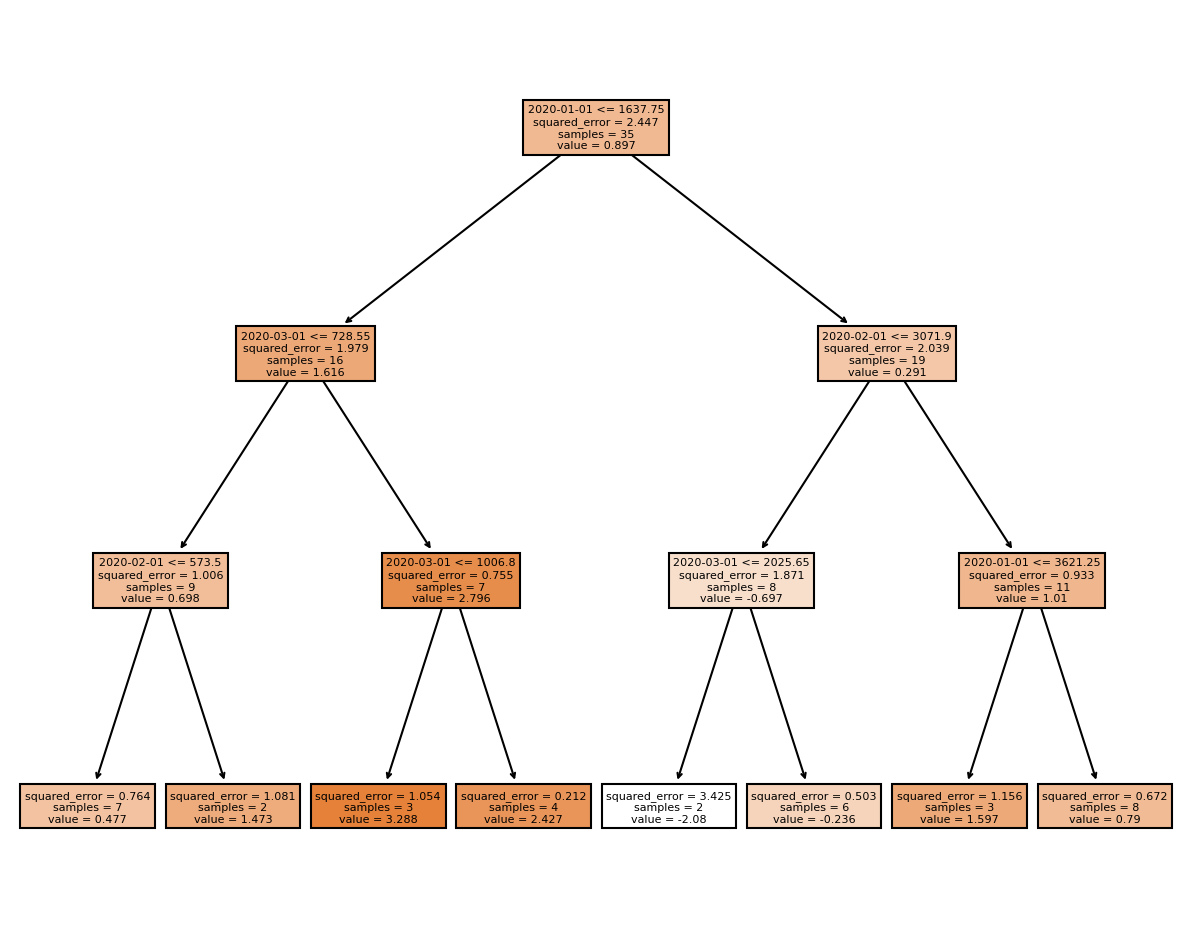

In [75]:
plt.figure(figsize=(10, 8), dpi=150)
plot_tree(model, feature_names=X_2020_Q1.columns.tolist(), filled = True)
plt.show()

Q2 Max Employment: 2020-04-01    14918.0
2020-05-01    15106.0
2020-06-01    15612.8
dtype: float64
Q2 Min Employment: 2020-04-01    248.3
2020-05-01    262.3
2020-06-01    264.0
dtype: float64
Q2 Max Increase in GDP % Change: -1.4260983626560635
Q2 Max Decrease in GDP % Change: -16.63690693098171
[ -8.56386338  -1.42609836 -12.76369872 -12.41238056  -8.90751801
  -6.35345537  -6.35345537  -2.61380239  -8.56386338 -12.41238056
 -12.76369872  -6.35345537  -1.42609836  -8.56386338  -6.35345537
  -8.90751801]


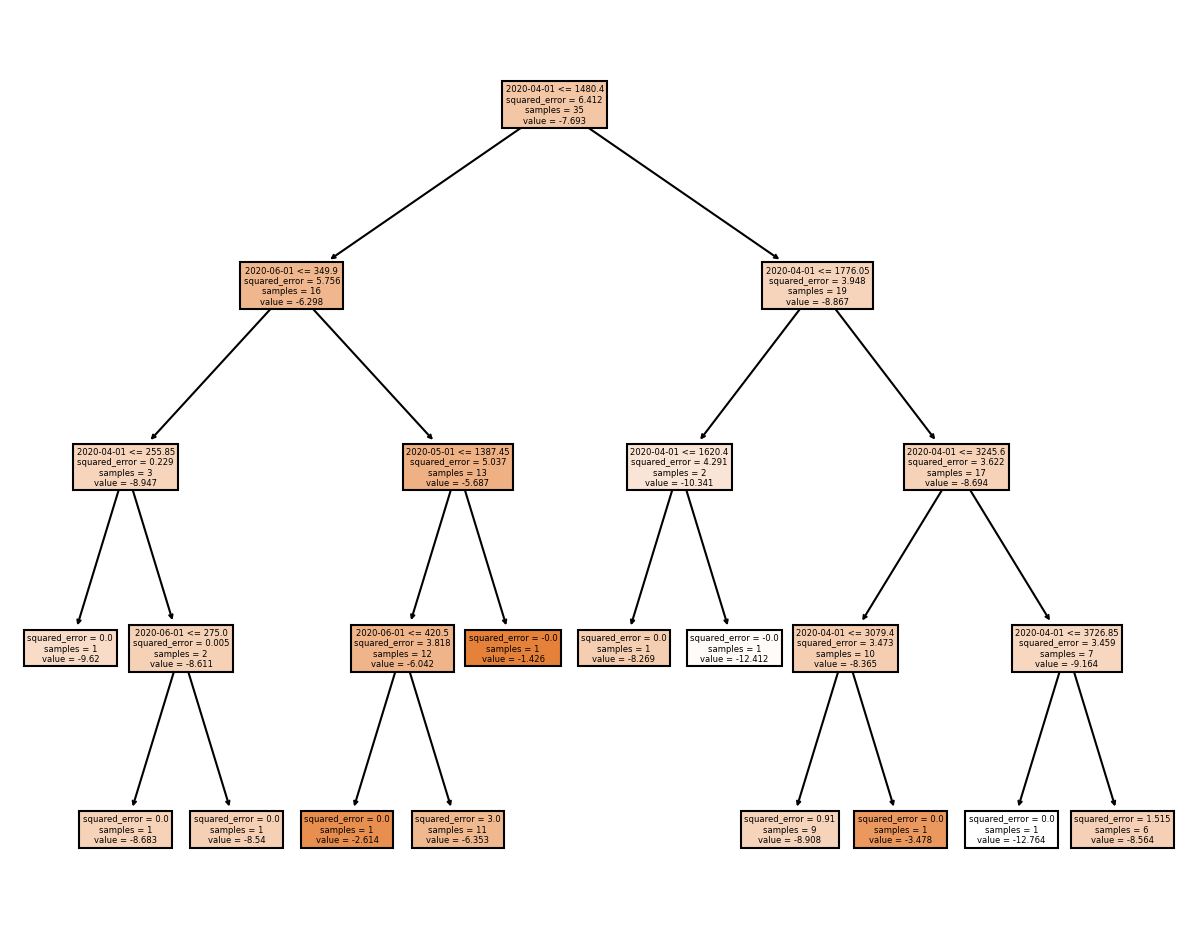

In [65]:
X_2020_Q2 = test_data[['2020-04-01', '2020-05-01', '2020-06-01']]
y_2020_Q2 = test_data['2020 Q2']

print("Q2 Max Employment:", np.max(X_2020_Q2))
print("Q2 Min Employment:", np.min(X_2020_Q2))
print("Q2 Max Increase in GDP % Change:", max(y_2020_Q2))
print("Q2 Max Decrease in GDP % Change:", min(y_2020_Q2))

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2020_Q2, y_2020_Q2, test_size=0.3, random_state=44)

model = DTR(random_state=44, max_depth = 4)
model.fit(X_train2, y_train2)
predictions = model.predict(X_test2)
print(predictions)

plt.figure(figsize=(10, 8), dpi=150)
plot_tree(model, feature_names=X_2020_Q2.columns.tolist(), filled = True)
plt.show()

Q3 Max Employment: 2020-07-01    15681.0
2020-08-01    15773.5
2020-09-01    15924.6
dtype: float64
Q3 Min Employment: 2020-07-01    266.3
2020-08-01    270.0
2020-09-01    271.8
dtype: float64
Q3 Max Increase in GDP % Change: 3.329340420753165
Q3 Max Decrease in GDP % Change: -14.113603473227212
[-1.75141846  0.61727571 -1.75141846 -7.02282815 -1.75141846  0.61727571
  0.61727571  3.04447235 -1.75141846 -7.02282815 -1.75141846  0.61727571
  0.61727571 -1.75141846  0.61727571 -1.75141846]


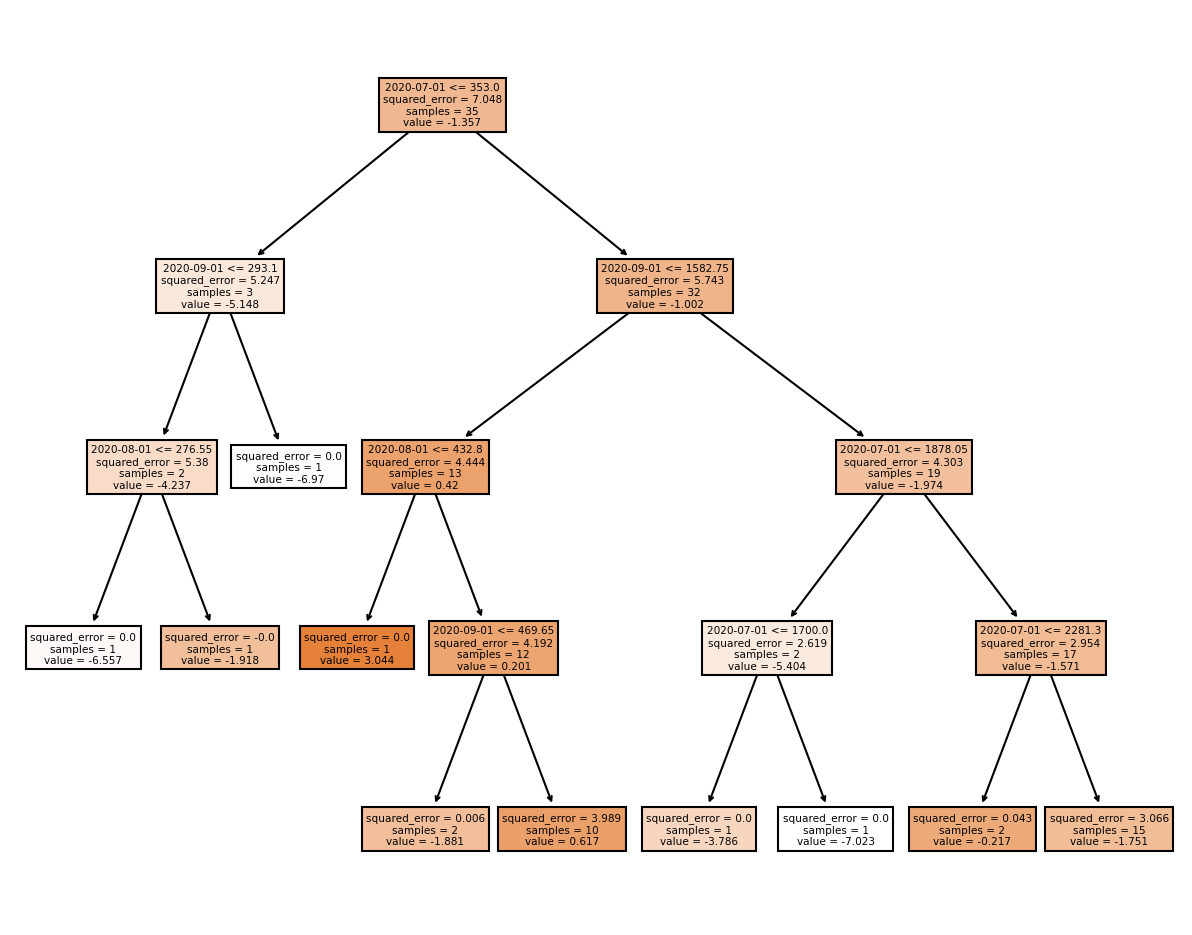

In [57]:
X_2020_Q3 = test_data[['2020-07-01', '2020-08-01', '2020-09-01']]
y_2020_Q3 = test_data['2020 Q3']

print("Q3 Max Employment:", np.max(X_2020_Q3))
print("Q3 Min Employment:", np.min(X_2020_Q3))
print("Q3 Max Increase in GDP % Change:", max(y_2020_Q3))
print("Q3 Max Decrease in GDP % Change:", min(y_2020_Q3))

X_train3, X_test3, y_train3, y_test3 = train_test_split(X_2020_Q3, y_2020_Q3, test_size=0.3, random_state=44)

model = DTR(random_state=44, max_depth = 4)
model.fit(X_train3, y_train3)
predictions = model.predict(X_test3)
print(predictions)

plt.figure(figsize=(10, 8), dpi=150)
plot_tree(model, feature_names=X_2020_Q3.columns.tolist(), filled=True)
plt.show()

Q1 Max Employment: 2020-10-01    16119.0
2020-11-01    16191.7
2020-12-01    16097.1
dtype: float64
Q1 Min Employment: 2020-10-01    272.1
2020-11-01    273.5
2020-12-01    274.9
dtype: float64
Q1 Max Increase in GDP % Change: 3.8708475050086055
Q1 Max Decrease in GDP % Change: -11.88802966580742
[-0.84424572  0.62028183 -0.84424572 -8.08064693 -0.84424572  0.62028183
  0.62028183  3.87084751 -2.3662841  -8.08064693 -0.84424572  0.62028183
  0.62028183 -0.84424572  0.62028183 -0.84424572]


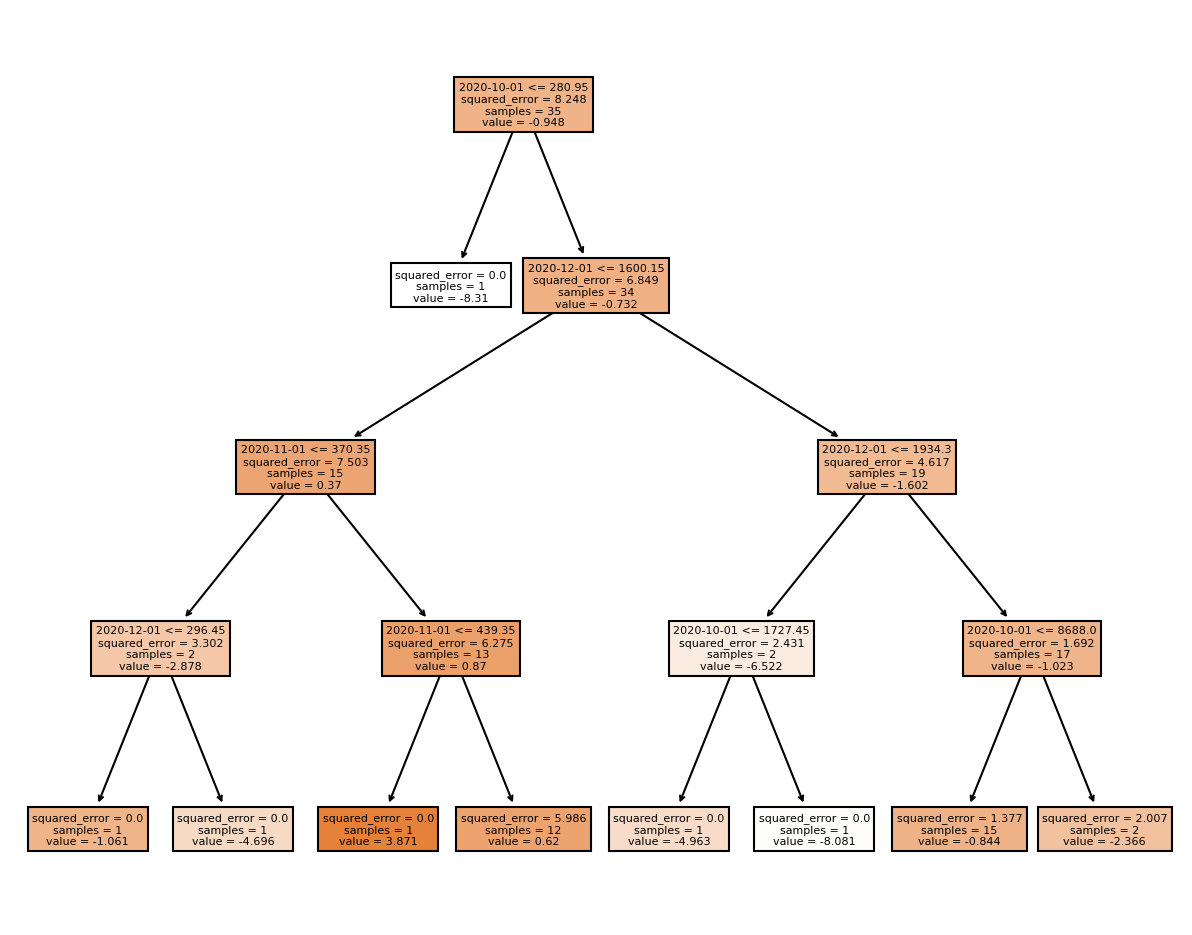

In [40]:
X_2020_Q4 = test_data[['2020-10-01', '2020-11-01', '2020-12-01']]
y_2020_Q4 = test_data['2020 Q4']

print("Q4 Max Employment:", np.max(X_2020_Q4))
print("Q4 Min Employment:", np.min(X_2020_Q4))
print("Q4 Max Increase in GDP % Change:", max(y_2020_Q4))
print("Q4 Max Decrease in GDP % Change:", min(y_2020_Q4))

X_train4, X_test4, y_train4, y_test4 = train_test_split(X_2020_Q4, y_2020_Q4, test_size=0.3, random_state=44)

model = DTR(random_state=44, max_depth = 4)
model.fit(X_train4, y_train4)
predictions = model.predict(X_test4)
print(predictions)

plt.figure(figsize=(10, 8), dpi=150)
plot_tree(model, feature_names=X_2020_Q4.columns.tolist(), class_names=classes, filled=True)
plt.show()

In [47]:
High1 = np.where(y_2020_Q1 > 0,
                "Yes",
                "No")

X1 = np.asarray(X_2020_Q1)

(X_train1,
 X_test1,
 High_train1,
 High_test1) = skm.train_test_split(X1,
                                   High1,
                                   test_size=0.5,
                                   random_state=0)

clf = DTC(criterion='entropy', random_state=0)
clf.fit(X_train1, High_train1)
accuracy_score(High_test1, clf.predict(X_test1))

0.5384615384615384